## Assignment 1.1 (Part 1): Exploring WS and BA models

**What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?**

The problem with random networks is that they don't predict the real world well. The expected maximum and minimum degree of nodes lies around the average degree. This contrasts the observation of the real world where so-called hubs with a larger amount of links, and also nodes with a very low amount of links are much more common in real world networks compared to random ones.

**List the four regimes that characterize random networks as a function of  ⟨k⟩
 .**

The four regimes characterizing random networks are the following:

### Subcritical Regime: 0 ‹ ‹k› ‹ 1
The network consists of several tiny connected components, but there is no emergence of a giant one. The size of the largest component increases slower than the size of the network. As a result this relative size of the largest component is zero (as we increase N).

### Critical Point: ‹k› = 1 
A "phase change" occurs here with the emergence of a giant component after ‹k› > 1. It is important to note that at this point the relative size of the larges component is still zero (as we increase N). 

### Supercritical Regime: ‹k› › 1
There is a giant component that looks like a network, and contains a small fraction of the nodes. This giant component coexists with smaller isolated components.

### Connected Regime: ‹k› › lnN 
In this regime the giant component includes all nodes, and the network is connected.


**According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering  C(k) decreases as a function of  k
in real-world networks?**

Because this observation within real world networks (e.g. protein interactions, science collaboration, etc.) is in contrast with the predictions of the random network, which shows that this *shouldn't* decrease. Random networks predict that the clustering coefficient is not dependent on k. This is also well illustrated in the book in  [Section 3.9 Image 3.13.](http://networksciencebook.com/chapter/3#clustering-3-9)

**First, let's use networkx to play around with WS graphs. Use nx.watts_strogatz_graph to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity  p=0,0.1,
  and  1
 . Calculate the average shortest path length  ⟨d⟩
  for each one.**

In [1]:
import networkx as nx
G1 = nx.watts_strogatz_graph(500, 4, 0)
G2 = nx.watts_strogatz_graph(500, 4, 0.1)
G3 = nx.watts_strogatz_graph(500, 4, 1)

In [17]:
avg_shortest_path_G1 = nx.average_shortest_path_length(G1)
avg_shortest_path_G2 = nx.average_shortest_path_length(G2)
avg_shortest_path_G3 = nx.average_shortest_path_length(G3)

print(f"Average shortest path for p=0, 0.1, 1: {avg_shortest_path_G1, avg_shortest_path_G2, avg_shortest_path_G3}")

Average shortest path for p=0, 0.1, 1: (62.875751503006015, 7.772569138276553, 4.764112224448898)


**Describe what happens to the network when  p=1.**

With p=1 we get essentially a random network, as every link is rewired from the original lattice structure. We can observe the average shortest path decreasing which shows how the random network is able to model the small world property better.

**Generate a lot of networks with different values of  p
 . You will notice that paths are short when  p
  is close to one and they are long when  p=0
 . What's the value of  p
  for which the average shortest path length gets close to the short paths we find in a fully randomized network.**

In [ ]:
import random
prob_findings = {}
prob = 0.00
#try 100 different probabilities from 0 to 1
for i in range(100):
    G = nx.watts_strogatz_graph(500, 4, prob)
    prob_findings[prob] = nx.average_shortest_path_length(G)
    prob += 0.01

In [21]:
sorted_probs = sorted(list(prob_findings.items()), key=lambda x: x[0])


Let's define being "close" in terms of length as the length of the paths are within 1.

In [20]:
for p in sorted_probs:
    if abs(p[1] - avg_shortest_path_G3) < 1:
        print(f"p value close to p=1 average shortest path at probability {p[0]} with average shortest path {p[1]}")
        break

p value close to p=1 average shortest path at probability 0.26000000000000006 with average shortest path 5.6545571142284565


At already p=0.26 we are within 1 distance of the average shortest path of the fully random network. The closer we get to p=1, the closer the average shortest path is to the one observed in random networks.

**Let's investigate this behavior in detail. Generate 50 networks with  N=500
 ,  ⟨k⟩=4
 , for each of  p={0,0.01,0.03,0.05,0.1,0.2}
 . Calculate the average of  ⟨d⟩
  as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot.**

In [23]:
import numpy as np
probs = [0, 0.01, 0.03, 0.05, 0.1, 0.2 ]
prob_findings = {}

for p in probs:
    samples = []
    #50 samples for each probability
    for i in range(50):
        G = nx.watts_strogatz_graph(500, 4, p)
        samples.append(nx.average_shortest_path_length(G))

    avg_path = np.mean(samples)
    std_path = np.std(samples)
    prob_findings[p] = (avg_path, std_path)



In [24]:
print(f"{prob_findings}")

{0: (np.float64(62.87575150300602), np.float64(7.105427357601002e-15)), 0.01: (np.float64(24.125293787575153), np.float64(5.092803301453433)), 0.03: (np.float64(13.220029498997997), np.float64(1.5317102809957828)), 0.05: (np.float64(10.315917915831665), np.float64(0.6908600496284696)), 0.1: (np.float64(7.708141883767535), np.float64(0.28001559493279776)), 0.2: (np.float64(6.10784144288577), np.float64(0.11527495404397985))}


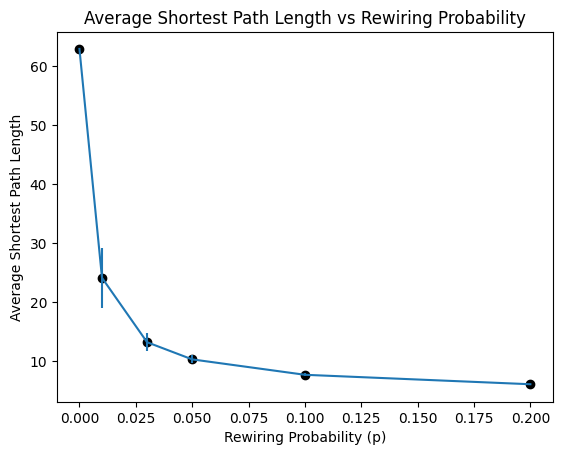

In [25]:
from matplotlib import pyplot as plt
x = list(prob_findings.keys())
y = [prob_findings[p][0] for p in x] #average shortest path
yerr = [prob_findings[p][1] for p in x] #std deviation for each
plt.errorbar(x, y, yerr=yerr)
plt.scatter(x, y, color='black')
plt.xlabel('Rewiring Probability (p)')
plt.ylabel('Average Shortest Path Length')

plt.title('Average Shortest Path Length vs Rewiring Probability')
plt.show()

The figure above shows how the average shortest path length decreases as we increase the rewiring probability. It is interesting to see how steep the initial decrease is from p=0 to p=0.05. This means with only a few rewirings we are able to capture the small world property significantly better.

## Assignment 1.1 (Part 2)

# Exercises: BA edition
First a couple of questions to make sure that you've actually read the text.

- **What are the three slope dependent regimes of complex networks with power-law degree distributions? Briefly describe each one. (You will have to skim chp 4.7 to answer this one).**

Note:

- $k_{max} = k_{min}N^{\frac{1}{\gamma-1}}$ ($2.1$) **[1]**

- $\langle d \rangle\sim\begin{cases}
\text{const.} & \gamma=2\\
\ln\ln N & 2<\gamma<3\\
\frac{\ln N}{\ln\ln N} & \gamma=3\\
\ln N & \gamma>3\\
\end{cases}$ ($2.2$) **[2]**

- $\langle k^{n} \rangle=\sum_{k_{min}}^{\infty}{k^{n}p_{k}}\approx C\frac{k_{max}^{n-\gamma+1}-k_{min}^{n-\gamma+1}}{n-\gamma+1}$ ($2.3$) **[3]**

1. Anomalous Regime ($\gamma \leq 2$):

    There are two possible cases for this regime, namely the case for $\gamma<2$ and $\gamma=2$. For $\gamma<2$, the exponent $\frac{1}{\gamma-1}$ in ($2.1$) is larger than $1$. This predicts that a node exists with a degree of $k_{max} > N$ and it will run out of nodes to connect to. This shows that a large scale-free network with $\gamma<2$ can't exist unless the network allows multi-link. The average degree $\langle k\rangle$ diverges in the $N \to\infty$ limit.

    The other case for $\gamma=2$, the exponent is equal to 1, meaning that the maximum degree is linearly proportional to the network size, i.e. $k_{max}\sim N$. Similar to hub and spoke configuration, the node with a degree of $k_{max}$ will act as a central hub because it connects to all other nodes in the network. The average path length $\langle d\rangle$ is a constant and doesn't depend on $N$.

1. Scale-Free Regime ($2<\gamma>3$):
    
    With $1<\gamma-1<2$, there are two possible cases for the exponent $n-\gamma+1$ in ($2.2$). For $n=1$, the exponent $n-\gamma+1$ is less than zero, meaning that the first moment of the degree distribution is finite. While for $n\geq2$, the exponent $n-\gamma+1$ is less than zero, causing the second and higher moments diverge as $N \to\infty$. Since the exponent in ($2.1$) is smaller than $1$, the market share of the largest hub, $\frac{k_{max}}{N}$ decreases as N increases, i.e. $\frac{k_{max}}{N}\sim N^{-\frac{\gamma-2}{\gamma-1}}$.

    Equation ($2.2$) shows that the average path length $\langle d\rangle$ in this regime is $\ln\ln N$ which grows significantly slower than both $\ln N$ and $\frac{\ln N}{\ln\ln N}$. Meaning that scale-free networks in this regime are "ultra-small", as the increase in network size radically reduces path.

1. Random Network Regime $(\gamma>3)$:

    With $\gamma-1>2$, the first ($n=1$) and second ($n=2$) moment of the degree distribution are finite as the exponent $n-\gamma+1$ in ($2.2$) is less than $1$ for both $n=1, 2$. Consequently, the third and higher degree diverge as $N \to\infty$. Scale-free networks in this regime are "small" and the average path length $\langle d\rangle$ follows the small world result from random networks.
    
    The properties of scale-free networks in this regime are difficult to distinguish from properties of a random network of a similar size. As $\gamma$ increases, it will be harder to differentiate from a random network. This is due to the limited size of the available networks with large degree exponent, making it difficult to obtain convincing evidence of their scale-free nature.

### Reference

[1] Barabási, A.-L. (n.d.). *Hubs*. In **Network Science** (Chapter 4.3). Retrieved from http://networksciencebook.com/chapter/4

[2] Barabási, A.-L. (n.d.). *Ultra-Small Property*. In **Network Science** (Chapter 4.6). Retrieved from http://networksciencebook.com/chapter/4

[3] Barabási, A.-L. (n.d.). *The Meaning of Scale-Free*. In **Network Science** (Chapter 4.4). Retrieved from http://networksciencebook.com/chapter/4

- **What are the three regimes we find in non-linear preferential attachement? (chapter 5) Briefly describe each one.**

Note:
- $p_{k}\sim\begin{cases}
\exp(\frac{-2\mu (\alpha)}{\langle k\rangle(1-\alpha)}k^{1-\alpha}) & 0<\alpha<1 & \text{streteched exponential distribution}\\
k^{-\gamma} & \alpha=1 & \text{power law distribution}\\
\end{cases}$ ($2.4$) **[1]**

- $k_{max}\sim\begin{cases}
(\ln t)^{\frac{1}{1-\alpha}} & 0<\alpha<1\\
t^{\frac{1}{\gamma-1}} & \alpha=1\\
t & \alpha>1\\
\end{cases}$ ($2.5$) **[1]**


1. Sublinear regime ($0<\alpha<1$)

    For $0<\alpha<1$, the bias towards higher degree nodes exists but not strong enough to create a scale-free degree distribution. The degrees follow stretched exponential distribution in ($2.4$), where $\mu(\alpha)$ depends weakly on $\alpha$.

    The maximum degree, $k_{max}$, growth is logarithmic as shown in ($2.5$) causing fewer and smaller hubs compared to scale-free network. Networks in this regime resemble random networks as $\alpha\to0$ and gradually approach scale-free network as $\alpha\to1$

1. Linear regime ($\gamma=1$)
    
    This is the standard Barabási-Albert model where the degree distribution follows a power law distribution in ($2.4$). The maximum degree, $k_{max}$, grows polynomially with time as shown in ($2.5$). Networks in this regime are  scale-free networks if their degree distribution is a power law distribution which depends on $\gamma$.

1. Superlinear regime ($\gamma>1$)

    For $\gamma>1$, the bias to higher degree nodes is enhanced, meaning that the early nodes will become super hubs as newer nodes has a high chance of linking to them. The maximum degree, $k_{max}$, grows linearly with time as shown in ($2.5$). This winner takes all dynamic leads to a hub and spoke configuration.

### Reference

[1] Barabási, A.-L. (n.d.). *Non-linear Preferential Attachment*. In **Network Science** (Chapter 5.8). Retrieved from http://networksciencebook.com/chapter/5

In [74]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random

**We're going to create our own Barabasi-Albert model (a special case) in right in a notebook. Follow the recipe below for success:**

- **First create a graph consisting of a single link. (You can call the nodes anything, but I would simply use integers as names).**

In [75]:
# Create a simple graph consisting of 1 single edge (0, 1)
BA = nx.Graph([(0, 1)])
print("edges: ", BA.edges)

edges:  [(0, 1)]


- **Now add another node, connecting one of the existing nodes in proportion to their degree.**

In [76]:
# Choose either node 0 or node 1 randomly since both of them has the same degree
random_node = random.choice(list(BA.nodes))

# Add the edge into the network
BA.add_edge(2, random_node)
print("edges: ", BA.edges)

edges:  [(0, 1), (1, 2)]


- **Keep going until you have a 100 node network.**
    - **Hint: The difficult part here is connecting to each node according to their degree. The way I do it is: generate a list of all edges (e.g. pairs of nodes), then flatten it (e.g. remove connection information). That list contains each node in proportion to its connections, thus drawing a random node from that list (e.g. using random.choice) corresponds to selecting a node with probability proportional to it's degree.**

In [77]:
n = 100
# Add node 3 to n into the network (0, 1, 2 are already in the network)
for node in range(3, n):

    # Flatten the current edges list, which is a [List[List[int, int]]],
    # to represent the degree-based pool
    node_pool = np.array(BA.edges).flatten()

    # Randomly pick a node from the node_pool
    random_node = random.choice(node_pool)
    
    # Add the edge into the network
    BA.add_edge(node, random_node)
print("number of nodes: ", len(BA.nodes))
print("number of edges: ", len(BA.edges))

number of nodes:  100
number of edges:  99


- **Plot the network.**

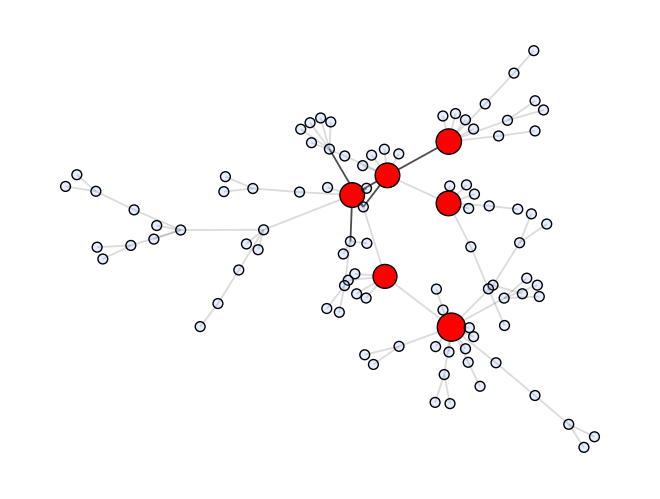

In [78]:
# Get a dictionary for node-degree pair and get max degree
degrees = dict(BA.degree())
degrees_values = list(degrees.values())
max_degree = max(degrees_values)

# Calculate mean and standard deviation for minimum degree to be a hub
mean_degrees = np.mean(degrees_values)
std_degrees = np.std(degrees_values)
hub_degree_criteria = mean_degrees + 2 * std_degrees

# Create list of colors based on the hub degree criteria
hub_color, hub_alpha = 'red', 1
default_color, default_alpha = '#7FA8FF', 0.2
node_colors = []
alphas = []

# Create a list of node sizes based on its hub degree with proper scaling
min_size = 50
scaling_factor = 100
node_sizes = []

node_sizes = []
for node in BA.nodes():
    degree = degrees[node]
    if degree >= hub_degree_criteria:
        size = min_size + (degree ** 0.5) * scaling_factor
        node_colors.append(hub_color)
        alphas.append(hub_alpha)
        node_sizes.append(size)
    else:
        node_colors.append(default_color)
        alphas.append(default_alpha)
        node_sizes.append(min_size)

# Plot
nx.draw_spring(BA, node_size=node_sizes, with_labels=False, node_color=node_colors, node_shape='o', edge_color='.3', width=1.3, edgecolors='black', alpha=alphas)

**Figure 1.2.1**

The figure shows the plot of a scale-free network using the Barabasi-Albert model with $n=100$ and $m=1$. The red nodes represent the hubs, whose degree is larger than or equal to the mean degree plus two standard deviation ($\mu + 2\sigma$).

- Add more nodes until you have a 5000 node network.

In [79]:
# Do the same process as before but with a different n
n = 5000

# Add node 100 to n into the network (0 to 99 are already in the network)
for node in range(100, n):
    node_pool = np.array(BA.edges).flatten()
    random_node = random.choice(node_pool)
    BA.add_edge(node, random_node)
print("number of nodes: ", len(BA.nodes))
print("number of edges: ", len(BA.edges))


number of nodes:  5000
number of edges:  4999


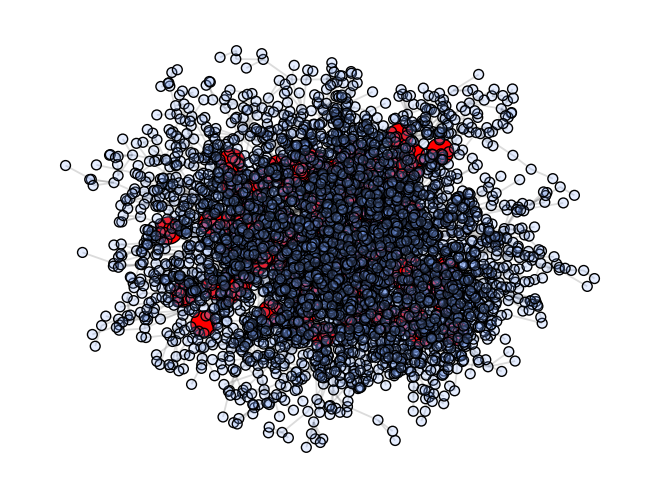

In [80]:
# Repeat the same plotting procedure as before
degrees = dict(BA.degree())
degrees_values = list(degrees.values())
max_degree = max(degrees_values)

mean_degrees = np.mean(degrees_values)
std_degrees = np.std(degrees_values)
hub_degree_criteria = mean_degrees + 2 * std_degrees

hub_color, hub_alpha = 'red', 1
default_color, default_alpha = '#7FA8FF', 0.2
node_colors = []
alphas = []

min_size = 50
scaling_factor = 100
node_sizes = []

node_sizes = []
for node in BA.nodes():
    degree = degrees[node]
    if degree >= hub_degree_criteria:
        size = min_size + (degree ** 0.5) * scaling_factor
        node_colors.append(hub_color)
        alphas.append(hub_alpha)
        node_sizes.append(size)
    else:
        node_colors.append(default_color)
        alphas.append(default_alpha)
        node_sizes.append(min_size)

nx.draw_spring(BA, node_size=node_sizes, with_labels=False, node_color=node_colors, node_shape='o', edge_color='.3', width=1.3, edgecolors='black', alpha=alphas)

**Figure 1.2.2**

The figure shows the plot of a scale-free network using the Barabasi-Albert model with $n=5000$ and $m=1$. The red nodes represent the hubs, whose degree is larger than or equal to the mean degree plus two standard deviation ($\mu + 2\sigma$). It is evident that hubs are generally older nodes by the fact that they are clustred in the dense center of the network, visually hidden by low degree nodes.

- **What's the maximum and minimum degree?**

In [81]:
# Get all the degree for each node
degree_list = [BA.degree[node] for node in BA.nodes]

# Store frequency of each degree:
# x = unique degree values
# y = number of nodes that have each degree
x, y = np.unique(degree_list, return_counts=True)
max_degree, min_degree = max(y), min(y)
print("maximum degree: ", max_degree)
print("minimum degree: ", min_degree)

maximum degree:  3369
minimum degree:  1


- **Now, bin the degree distribution using numpy.histogram.**

In [82]:
# Use numpy.histogram to get histogram values
hist, bins = np.histogram(degree_list, bins=120)

assert len(hist) == len(bins) - 1
# bins contains the edges of each bin, so it has one more element than hist
# Calculate the center of each bin for the x-axis values
bin_centers = (bins[:-1] + bins[1:]) / 2

- **Plot the distribution. Plot it with both linear and log-log axes.**

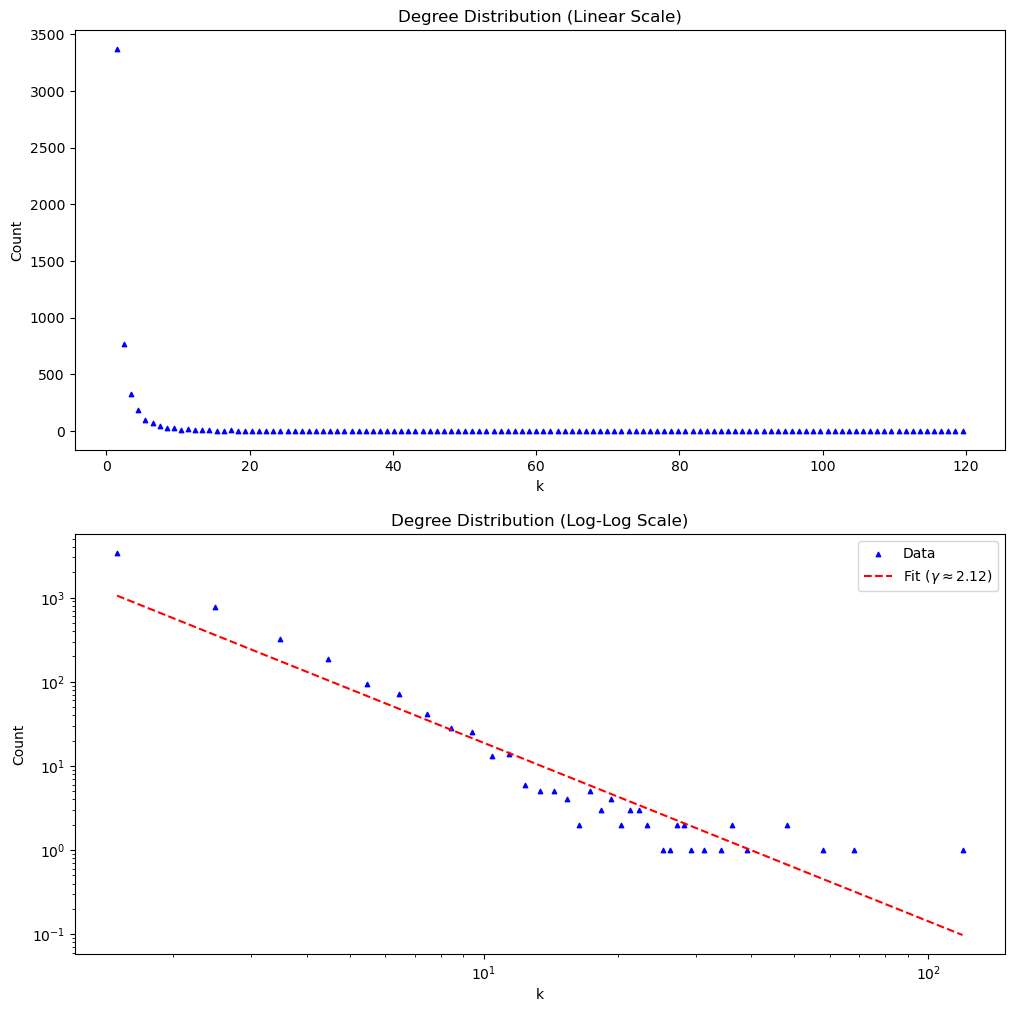

In [83]:
fig, axs = plt.subplots(2, figsize=(12,12))

# Linear axis plot
axs[0].scatter(bin_centers, hist, color='blue', s=10, marker='^')
axs[0].set_title("Degree Distribution (Linear Scale)")
axs[0].set_xlabel("k")
axs[0].set_ylabel("Count")

# Log-log axis plot
axs[1].scatter(bin_centers, hist, color='blue', s=10, marker='^', label="Data")

# Remove the points where hist (count) is zero
valid_indices = hist > 0
log_k = np.log(bin_centers[valid_indices])
log_count = np.log(hist[valid_indices])

# Calculate the linear regression with least squares fit
slope, intercept = np.polyfit(log_k, log_count, 1)
fitted_line = slope * log_k + intercept

# Plot regression line
axs[1].plot(np.exp(log_k), np.exp(fitted_line), color='red', linestyle='--', label=f'Fit ($\gamma \\approx {-slope:.2f}$)')

axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_title("Degree Distribution (Log-Log Scale)")
axs[1].set_xlabel("k")
axs[1].set_ylabel("Count")
axs[1].legend()
plt.show()

**Figure 1.2.3**

The figure consists of two plots, showing the degree distribution of a Barabasi-Albert model with $n=5000$ and $m=1$ in linear scale (top plot) and log-log scale (bottom plot), respectively.

In the top plot, it is shown that over 75 percent of the nodes have the lowest degrees. The node count drops dramatically, making it difficult to observe the high degree node count.

In the bottom plot, the degree distribution closely follows a linear trend shown by the red dashed regression line with a negative slope ($\gamma=-m$). This indicates that the degree distribution follows a power law, confirming the scale-free nature of the network.

# Part 1.2: Stats and visualization of the Rock Music Network

For this part of the assignment we have each developed our own version and compared the results at the end, improving our versions based on each other's feedback. The code and markdown presented in this notebook is from Denisa's version, however on some steps alternative approaches from other group members are mentioned.

In order to create the network of Rock Musicians we have all started with creating the Regex expression that would find the content inside any [[]] link in the Wikipedia page.

*Denisa's approach: Select the link with the | included.*

*Botond's approach: Select only the first part of the link, up until |.*

In [3]:
wiki_pattern = '\[\[(.+?)\]\]'

Next, we download the list of Rock Musicians from Wikipedia with urllib.

In [4]:
import urllib
import re

title = 'List_of_mainstream_rock_performers'
url = "http://en.wikipedia.org/w/api.php?action=query&titles=%s&prop=revisions&rvprop=content&format=json" % title

req = urllib.request.Request(url, headers={'User-Agent' : "Magic Browser"}) 
con = urllib.request.urlopen(req)

source = con.read().decode('utf-8')

Then, we store all the links from the musicians' list page.

In [5]:
wiki_links_artists = re.findall(wiki_pattern, source)

When going through the list of links, we found some which were not corresponding to artists.

*Denisa's approach: Looking at the Wikipedia page, I noticed the first artist in the list is 10cc, while the last one is ZZ Top, so I have sliced the list to start from the index of the first artist to the index of the last one (+1 to add ZZ Top in the list too).*

*Botond's and Kyle's notes: When comparing our code, we realised that a link towards 'AllMusic' has to be removed too, since it is not an artist.*

In [6]:
first_artist = wiki_links_artists.index('10cc')
last_artist = wiki_links_artists.index('ZZ Top')
wiki_links_artists = wiki_links_artists[first_artist:last_artist+1]
wiki_links_artists.remove('AllMusic')

In order to add the artist name inside the URL to request, the spaces inside the names had to be removed.

*Denisa's approach: I replaced the spaces with '%20' since I noticed that is how the web browser does when entering the URL with the spaces in the search bar.*

*Botond's approach: Replaced the spaces with underscores.*

In [7]:
wiki_links_artists_to_parse = [x.replace(' ','%20') for x in wiki_links_artists] 

Then we went through each artist's name, got the content at the URL corresponding to the artist and saved it in a file with the name of the artist.

The artist.replace('/', '_') deals with the cases such as AC/DC when the makedirs would create a file (DC) inside a folder (AC).

In [ ]:
import os

for artist in wiki_links_artists_to_parse:
    url = "http://en.wikipedia.org/w/api.php?action=query&prop=revisions&rvprop=content&format=json&titles=%s&rvslots=main" % artist
    req = urllib.request.Request(url, headers={'User-Agent' : "Magic Browser"}) 
    con = urllib.request.urlopen(req)
    source = con.read().decode('utf-8')

    # Change this according to the path you choose to save the files
    path = '/Volumes/MASTER/Year1/Social_graphs/artists'
    dir = path + '/%s.txt' % artist.replace('/', '_')
    os.makedirs(os.path.dirname(dir), exist_ok=True)
    with open(dir, 'w+') as file:
        file.write(source)

Having generated the files with the content of the pages, we continued by creating a graph where each node is an artist's name.

*Notes from feedback: When we were comparing results (node count, edge count, adjacency matrices, in and out degrees, predecessors), we found an edge case for the band KISS. While in the list of performers it is present as Kiss (band)|Kiss, inside the content of the file of 3 Doors Down it is present as Kiss (band)|KISS. This led to the idea of using all the artist names in lowercase inside the nodes.*

In [ ]:
import networkx as nx

# Change every artist's name to lowercase
wiki_links_artists_lower = [artist.lower() for artist in wiki_links_artists]

network = nx.DiGraph()
network.add_nodes_from(wiki_links_artists_lower)

We then parsed the contents of each file to extract all the links it contained. Whenever a link matched a node in the graph (i.e., another rock artist), we added an edge from the artist represented by the current file to the artist referenced in the link.

During this step we also stored the length of the file content as an attribute of the node corresponding to the current file.

In [ ]:
# Get all the files saved at the path
files = os.listdir(path)

# Parse every file
for i in range(len(files)):
    with open(path +'/'+ files[i], 'r') as f:
        text = f.read()
        # Get the total number of words
        word_count = len(re.findall(r"\w", text))
        # Store it as an attribute to the node corresponding to the current file
        nx.set_node_attributes(network, {wiki_links_artists_lower[i]: {'word_count': word_count}})
        # Find all the links in the file
        wiki_links_in_file = re.findall(wiki_pattern, text)
        # Parse each link
        for j in range(len(wiki_links_in_file)):
            try: 
                # If the link corresponds to another rock artist, add an edge from the artist represented by the current file to the artist referenced in the link
                # The check is done in lowercase letters.
                if wiki_links_in_file[j].lower() in wiki_links_artists_lower:
                    network.add_edge(wiki_links_artists_lower[i], wiki_links_in_file[j].lower())
            except:
                continue

We then discarded the isolated nodes using the NetworkX isolates function.

In [ ]:
isolated = list(nx.isolates(network))
network.remove_nodes_from(isolated)

Then, we selected the largest component of the network by getting the maximum of the weakly connected components.

In [ ]:
largest_component = max(nx.weakly_connected_components(network), key=len)

Regarding the following:
* **Then, write a short section about which part of the process that was most difficult**
* **Next write a short section about how you used LLMs to help you**
* **Finally, compose a short section about what you would do differently if you had to do it again**

*Denisa's answer: For me the most difficult part was creating the actual graph, making sure that I am correctly choosing the indices and creating the edges between the correct nodes. As for the LLM, I used it to check my Regex expression, look up how to access files and also how to visualise the graph with pyvis. I think if I would do it again I would try to write the network creation in a cleaner way. On first iteration I was more focused on making the process work, rather than the look of my code.*

In the following section we describe the statistics and analysis of the network.

First we recreate the network from the information stored on Github.

In [11]:
import io
import networkx as nx

url = "https://raw.githubusercontent.com/denisababeii/socialgraphs_assignment1/refs/heads/denisa/network.graphml"

# Download the content of the raw file from Github with the network information
with urllib.request.urlopen(url) as response:
    data = response.read()

# Load directly into NetworkX
network = nx.read_graphml(io.BytesIO(data))

* **What is the number of nodes in the network?**

In [ ]:
network.number_of_nodes()

484

* **More importantly, what is the number of links? (Chat with a fellow student or a TA to make sure you're in the right ball-park)**

In [ ]:
network.number_of_edges()

7655

* **Plot the in and out-degree distributions for the entire network. What do you observe? Can you explain why the in-degree distribution is different from the out-degree distribution?**

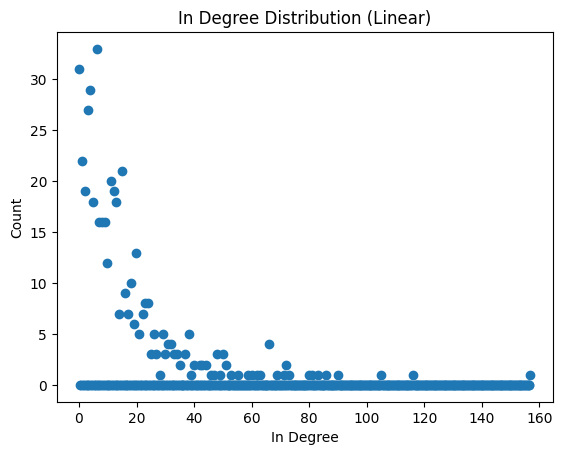

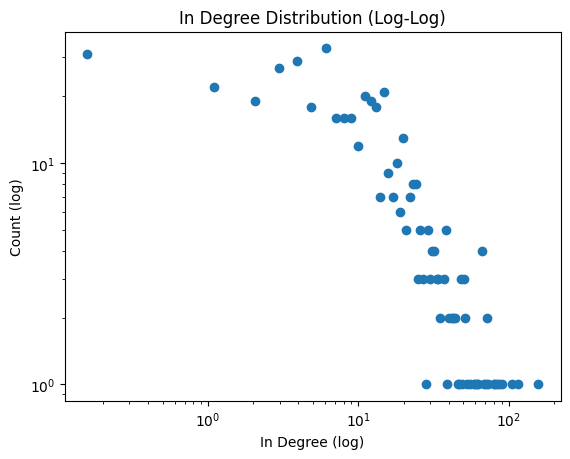

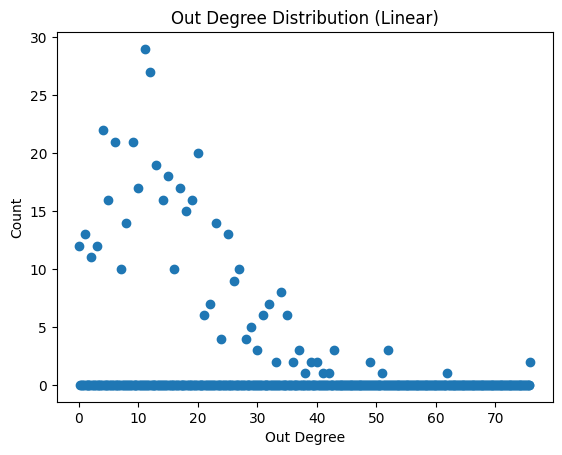

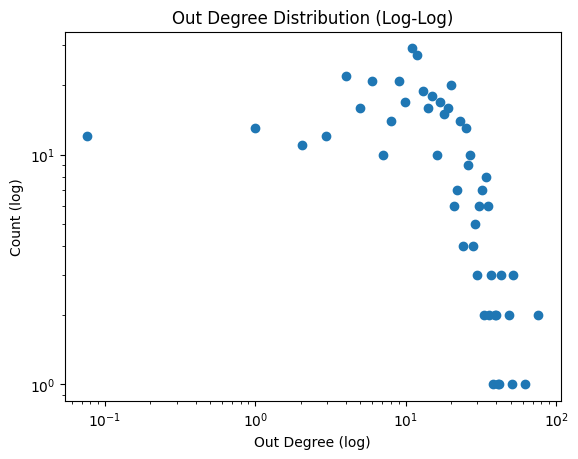

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

counts, bin_edges = np.histogram([deg for node, deg in network.in_degree()], 500)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

plt.figure()
plt.plot(bin_centers, counts, 'o')
plt.xlabel('In Degree')
plt.ylabel('Count')
plt.title('In Degree Distribution (Linear)')
plt.show()

plt.figure()
plt.plot(bin_centers, counts, 'o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('In Degree (log)')
plt.ylabel('Count (log)')
plt.title('In Degree Distribution (Log-Log)')
plt.show()

counts, bin_edges = np.histogram([deg for node, deg in network.out_degree()], 500)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

plt.figure()
plt.plot(bin_centers, counts, 'o')
plt.xlabel('Out Degree')
plt.ylabel('Count')
plt.title('Out Degree Distribution (Linear)')
plt.show()

plt.figure()
plt.plot(bin_centers, counts, 'o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Out Degree (log)')
plt.ylabel('Count (log)')
plt.title('Out Degree Distribution (Log-Log)')
plt.show()

The conclusions we have drawn from the plots are that most artists have low in degree, but a small number of artists are referenced by many others. This aligns with the expectation that only a few rock artists are famous enough to be heavily referenced. Out degree is smaller in range than the in degree, with fewer artists having very high out degree values. This means that a small amount of artists reference many others.

* **Compare the out-degree distribution to a random network with the same number of nodes and links.**

Comparing the out degree distribution to a random network with the same number of nodes and links, we can see the out degree for the random graph follows a normal distribution, while for the artists' network it follows a linear one.

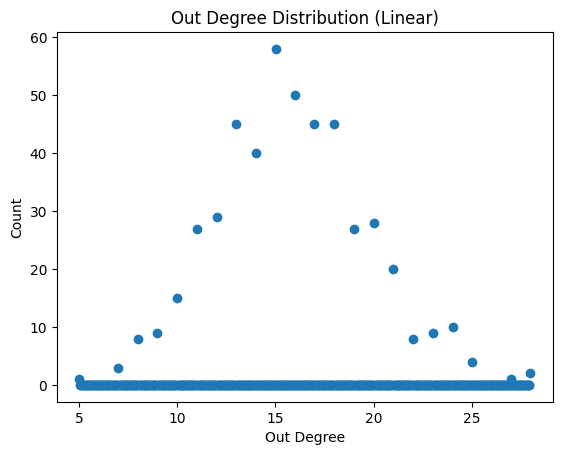

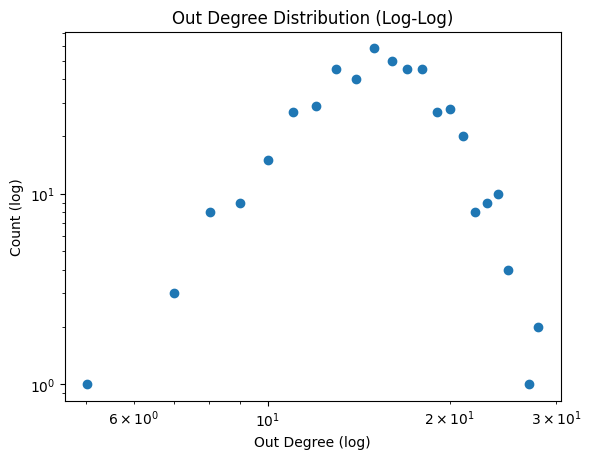

In [ ]:
random_network = nx.gnm_random_graph(network.number_of_nodes(), network.number_of_edges(), 0, directed=True)

counts, bin_edges = np.histogram([deg for node, deg in random_network.out_degree()], 500)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

plt.figure()
plt.plot(bin_centers, counts, 'o')
plt.xlabel('Out Degree')
plt.ylabel('Count')
plt.title('Out Degree Distribution (Linear)')
plt.show()

plt.figure()
plt.plot(bin_centers, counts, 'o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Out Degree (log)')
plt.ylabel('Count (log)')
plt.title('Out Degree Distribution (Log-Log)')
plt.show()

* **Compare the in-degree distribution to a scale-free network with the same number of nodes.**

Comparing the in degree distribution of a scale-free network with the same number of nodes, we can see the in degree for the scale-free graph is similar to the distribution of the in degree of the artists' network.

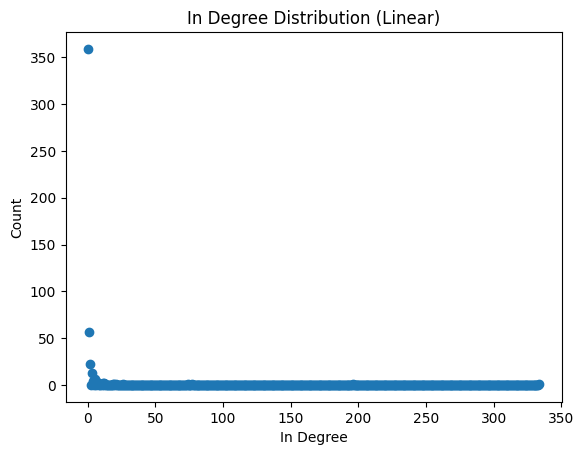

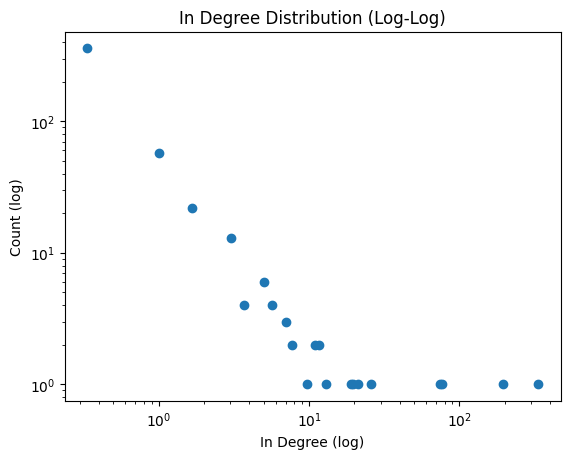

In [ ]:
scale_free_network = nx.scale_free_graph(network.number_of_nodes())

counts, bin_edges = np.histogram([deg for node, deg in scale_free_network.in_degree()], 500)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

plt.figure()
plt.plot(bin_centers, counts, 'o')
plt.xlabel('In Degree')
plt.ylabel('Count')
plt.title('In Degree Distribution (Linear)')
plt.show()

plt.figure()
plt.plot(bin_centers, counts, 'o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('In Degree (log)')
plt.ylabel('Count (log)')
plt.title('In Degree Distribution (Log-Log)')
plt.show()

* **Who are the top 5 most connected performers (Report results for in-degrees and out-degrees, that is, who has highest in-degree, who has highest out-degree)? Comment on your findings. Is this what you would have expected?**

Computing the top 5 artists with the highest in degree, we can see highly influential artists in the list, as expected. The list does seem to showcase the artists we would predict.

In [ ]:
top_5_in_degree_nodes = sorted(network.in_degree(), key=lambda x: x[1], reverse=True)[:5]
top_5_in_degree_nodes = [node for node, degree in top_5_in_degree_nodes]

top_5_in_degree_nodes

['the beatles',
 'led zeppelin',
 'the rolling stones',
 'bob dylan',
 'queen (band)|queen']

Computing the top 5 artists with the highest out degree, we can also see highly influential artists in the list. For the out degree we were not as sure about what to expect in terms of artists' names, as the amount of references an artist page has to others could depend on membership in many bands or collaborations.

In [ ]:
top_5_out_degree_nodes = sorted(network.out_degree(), key=lambda x: x[1], reverse=True)[:5]
top_5_out_degree_nodes = [node for node, degree in top_5_out_degree_nodes]

top_5_out_degree_nodes

['alice in chains',
 'deep purple',
 'black sabbath',
 "guns n' roses",
 'queen (band)|queen']

* **What are the 10 pages with the longest wiki entries? (use the length of content attribute to figure this one out)?**

In [ ]:
top_10_longest_content = sorted(network.nodes(data=True), key=lambda x: x[1]["word_count"], reverse=True)[:10]

top_10_longest_content

[('chicago (band)|chicago', {'word_count': 398604, 'size': 10}),
 ("guns n' roses", {'word_count': 287748, 'size': 10}),
 ('coldplay', {'word_count': 232078, 'size': 10}),
 ('europe (band)|europe', {'word_count': 229014, 'size': 10}),
 ('marilyn manson (band)', {'word_count': 228596, 'size': 10}),
 ('queen (band)|queen', {'word_count': 224581, 'size': 10}),
 ('ghost (swedish band)|ghost', {'word_count': 217596, 'size': 10}),
 ('boston (band)|boston', {'word_count': 215494, 'size': 10}),
 ('the rolling stones', {'word_count': 209840, 'size': 10}),
 ('oasis (band)|oasis', {'word_count': 208704, 'size': 10})]

In order to visualise the graph, we have converted it into an undirected graph.

In [ ]:
undirected_network = network.to_undirected()

To plot according to the node degree and length of content, we saved these values in variables to input to the draw function.

In [ ]:
node_degrees = [undirected_network.degree(node) for node in undirected_network.nodes()]
content_lengths = [node[1]['word_count'] for node in undirected_network.nodes(data=True)]

In order to create a color palette we used the green color map taking values between the minimum and maximum length of the files' contents.

In [ ]:
cmap = plt.cm.Greens
norm = plt.Normalize(vmin=min(content_lengths), vmax=max(content_lengths))
node_colors = cmap(norm(content_lengths))

We used nx.spring_layout to draw the network, using the node degrees and the color palette created previously. We chose k=2 to better see the nodes with the highest degrees in the centre of the graph.

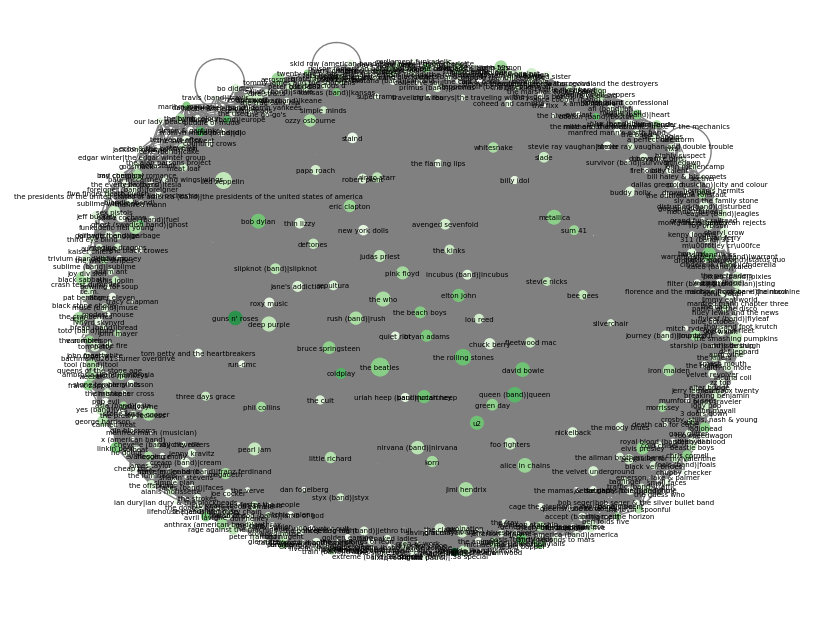

In [ ]:
layout_spring = nx.spring_layout(undirected_network, k=2)  

# Draw graph
plt.figure(figsize=(8, 6))
nx.draw(
    undirected_network, layout_spring,
    with_labels=True,
    node_size=node_degrees,
    node_color=node_colors,
    font_size=5,
    edge_color="grey"
)
plt.show()

The graph shows the dense interconnectedness between artists. Some of the highest degree nodes listed previously can be visualised in the centre of the graph, such as the ones corresponding to The Beatles, Metallica or The Rolling Stones.

We were also exploring other options and came across pyvis. Below is the implementation, the graph looks interesting, though it does not provide a clear view of the network. In order to see the graph you need to access the graph.html and wait for the network to load.

The cell below installs pyvis in the environment.

In [ ]:
!pip install pyvis

Then we create the graph.html with an interactive visualisation of the network. [This](https://raw.githubusercontent.com/denisababeii/socialgraphs_assignment1/refs/heads/denisa/graph.html) is the Github link to the already created HTML file.

In [ ]:
from pyvis.network import Network

# Convert to interactive Pyvis graph
net = Network(notebook=True, width="1000px", height="800px", bgcolor="#222222", font_color="white")
net.from_nx(network)

# Save and show
net.show("graph.html")

## Notes on contributions

All team members solved the exercises independently. The exercise of Week 4 was partially solved together, where we crosschecked our solutions and adjusted our approaches, as it revealed some blind spots that we didn’t think about regarding the regex patterns and the exclusion of some pages from the list of bands.

We assigned each team member a section of the assignment, to put their solution into and format/describe it properly. In the end we had a session where each team member presented their solution, based on this we adjusted the end version together.

- Assignment 1.1 Part 1 – Botond Rendes (s253343)
- Assignment 1.1, Part 2 – Kyle Nathan Yahya (s252786)
- Assignment 1.2 – Denisa Babeii (s253528)




## LLMs were used in the following way:
-	In Assignment 1.1 Part 1 the LLM helped with some keywords for adding elements to the plot.
-   In Assignment 1.2, we used it to check tje Regex expression, look up how to access files and also how to visualise the graph with pyvis.